In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn.cluster as skcluster
from scipy.stats import f_oneway
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Leer archivo csv
df = pd.read_csv("/content/drive/MyDrive/spotify-2023.csv", encoding="latin-1")

In [ ]:
# Obtener información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Sumar datos nulos por columna
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
# Eliminar datos nulos del dataset
df.dropna(inplace=True)

In [ ]:
# Extraer los nombres de las canciones sin repetir
df["track_name"].unique()

array(['Seven (feat. Latto) (Explicit Ver.)', 'LALA', 'vampire',
       'Cruel Summer', 'WHERE SHE GOES', 'Sprinter', 'Ella Baila Sola',
       'Columbia', 'fukumean', 'La Bebe - Remix', 'un x100to',
       'Super Shy', 'Flowers', 'Daylight', 'As It Was', 'Kill Bill',
       'Cupid - Twin Ver.',
       'What Was I Made For? [From The Motion Picture "Barbie"]',
       'Classy 101', 'Like Crazy', 'LADY GAGA',
       'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ',
       'I Wanna Be Yours', 'Peso Pluma: Bzrp Music Sessions, Vol. 55',
       'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)',
       'SABOR FRESA', 'Calm Down (with Selena Gomez)', 'MOJABI GHOST',
       'Last Night', 'Dance The Night (From Barbie The Album)', 'Rush',
       'TULUM', "Creepin'", 'Anti-Hero', 'TQG', 'Los del Espacio',
       'Frï¿½ï¿½gil (feat. Grupo Front', 'Blank Space', 'Style', 'TQM',
       'El Azul', 'Sunflower - Spider-Man: Into the Spider-Verse',
   

In [ ]:
for col in df:
    print (df[col])
    print(df[col].unique())

0      Seven (feat. Latto) (Explicit Ver.)
1                                     LALA
2                                  vampire
3                             Cruel Summer
4                           WHERE SHE GOES
                      ...                 
948                           My Mind & Me
949              Bigger Than The Whole Sky
950                   A Veces (feat. Feid)
951                          En La De Ella
952                                  Alone
Name: track_name, Length: 817, dtype: object
['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Daylight' 'Kill Bill'
 'Cupid - Twin Ver.' 'Classy 101' 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The '
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm 

In [ ]:
df["streams"].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '387570742', '1163093654', '496795686',
       '335222234', '363369738', '86444842', '52135248', '200647221',
       '115364561', '78300654', '899183384', '61245289', '429829812',
       '127408954', '22581161', '52294266', '843957510', '999748277',
       '618990393', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '570515054',
       '1647990401', '2565529693', '518745108', '107753850', '177740666',
       '153372011', '57876440', '256483385', '1214083358', '111947664',
       '156338624', '720434240', '357925728', '674072710', '1755214421',
       '404562836', '373199958', '14780425', '39578178', '54266102',
       '751134527', '1356565093', '1592909789', '635412045', '1230675890',
       '585695368', '43857627', '2009094673', '600976848', '39709

In [ ]:
for index, entry in df['streams'].items():
    try:
        numeric_entry = pd.to_numeric(entry, errors='coerce')
        if not numeric_entry >= 0:
            print(f'{index}: {numeric_entry}')
            print(f'Actual Data = {entry}')
    except ValueError:
        pass

574: nan
Actual Data = BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [ ]:
prod_df= df.drop(574)

In [ ]:
df = prod_df

In [ ]:
convert_to_string = {'track_name', 'artist(s)_name', 'key', 'mode'}
convert_to_numeric = {"in_deezer_playlists", "in_shazam_charts"}

In [ ]:
for col_name in convert_to_string:
    df[col_name] = df[col_name].astype("string")

In [ ]:
for col_name in convert_to_numeric:
    df[col_name] = df[col_name].str.replace(',', '').astype(np.int64)
df["streams"] = df["streams"].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    string
 1   artist(s)_name        816 non-null    string
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    int64 
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    int64 
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    string


In [ ]:
df.drop("track_name", axis=1, inplace=True)

In [ ]:
df.sort_values("streams", ascending = False)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
179,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,...,96,C#,Minor,83,93,65,58,0,9,8
41,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,...,90,D,Major,76,91,50,54,0,7,5
162,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,...,104,C#,Major,77,36,63,1,0,36,5
84,"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,...,170,C#,Major,59,48,76,4,0,10,5
140,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,121,...,125,A#,Minor,77,74,78,4,0,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Troye Sivan,1,2023,7,13,864,78,22581161,71,135,...,126,F,Minor,74,35,84,0,0,11,6
68,Post Malone,1,2023,7,14,410,36,14780425,36,32,...,140,C#,Major,56,48,73,0,0,35,4
142,"Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,2,...,133,B,Minor,93,68,65,42,0,12,25
393,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,78,...,105,G,Major,82,62,74,10,0,33,7


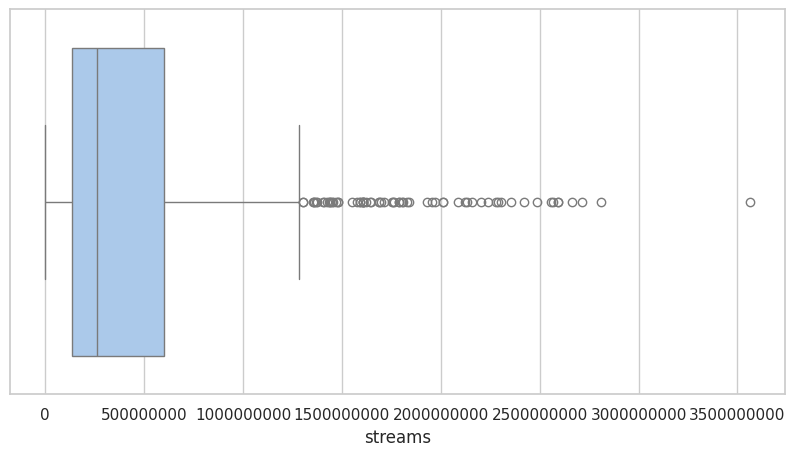

In [ ]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.boxplot(x="streams", data=df, orient="h")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [ ]:
lower_bound = df["streams"].quantile(0.01)

df_filtered = df[df["streams"] > lower_bound]
df_filtered.sort_values("streams", ascending = False)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
179,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,...,96,C#,Minor,83,93,65,58,0,9,8
41,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,...,90,D,Major,76,91,50,54,0,7,5
162,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,...,104,C#,Major,77,36,63,1,0,36,5
84,"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,...,170,C#,Major,59,48,76,4,0,10,5
140,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,121,...,125,A#,Minor,77,74,78,4,0,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Taylor Swift,1,2023,7,7,99,15,36912123,21,52,...,121,G,Major,65,49,78,0,0,17,4
289,"RM, Colde",2,2023,5,4,105,0,34502215,5,9,...,145,B,Minor,54,19,48,36,0,37,5
809,"Kendrick Lamar, Beth Gibbons",2,2022,5,13,1890,0,33381454,3,0,...,140,G#,Minor,49,50,37,87,0,11,35
238,"WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,10,...,101,F,Major,92,59,51,41,51,26,8


In [ ]:
df.sort_values("in_spotify_charts", ascending = False)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
2,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
29,Dua Lipa,1,2023,5,25,2988,101,127408954,0,0,...,110,B,Minor,67,78,85,2,0,33,5
3,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
13,David Kushner,1,2023,4,14,3528,98,387570742,80,156,...,130,D,Minor,51,32,43,83,0,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,Em Beihold,1,2022,1,28,2026,0,258714692,47,3,...,85,G#,Minor,74,61,52,30,0,26,9
675,Chase Atlantic,1,2017,10,4,2742,0,498960285,5,1,...,120,G#,Major,67,8,54,27,0,8,4
674,"GODZZ__-, Zakaria",2,2020,1,16,6955,0,1180896317,65,45,...,166,A#,Minor,81,83,75,14,0,29,34
673,"Eminem, Dido",2,1999,11,21,17115,0,918915401,83,63,...,80,F#,Minor,78,53,74,4,0,45,21


In [ ]:
df['in_spotify_charts'].value_counts()

in_spotify_charts
0     347
4      41
2      36
6      31
8      16
     ... 
79      1
66      1
41      1
62      1
37      1
Name: count, Length: 76, dtype: int64

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,13.712010,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,372.053922,2.454657,57.622549,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,9.294719,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,1157.759053,5.399650,153.616316,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,12.750000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,39.000000,0.000000,3.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,142.250000,2.000000,38.250000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,12367.000000,45.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
corr_matrix = df[["in_spotify_playlists",
                  "in_spotify_charts",
                  "streams",
                  "in_apple_playlists",
                  "in_apple_charts",
                  "in_deezer_playlists",
                  "in_deezer_charts",
                  "in_shazam_charts",
                  "bpm",
                  "key",
                  "mode",
                  "danceability_%",
                  "valence_%",
                  "energy_%",
                  "acousticness_%",
                  "instrumentalness_%",
                  "liveness_%",
                  "speechiness_%"]].corr(method='pearson', numeric_only=True)
corr_matrix

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
in_spotify_playlists,1.000000,0.141186,0.780404,0.688306,0.215504,0.829629,0.101158,0.082094,-0.034628,-0.097348,-0.029527,0.035968,-0.064896,-0.024631,-0.052002,-0.077870
in_spotify_charts,0.141186,1.000000,0.214034,0.207841,0.556509,0.077715,0.566020,0.573956,0.028496,0.050623,0.050862,0.105217,-0.073482,-0.005963,-0.026655,-0.094726
streams,0.780404,0.214034,1.000000,0.735321,0.269137,0.610812,0.184329,0.015715,-0.025694,-0.093268,-0.051014,-0.036499,-0.005751,-0.033039,-0.056664,-0.099968
in_apple_playlists,0.688306,0.207841,0.735321,1.000000,0.364339,0.468576,0.326598,0.138757,0.005237,-0.013306,0.042017,0.040211,-0.071554,-0.054524,-0.065062,-0.098233
in_apple_charts,0.215504,0.556509,0.269137,0.364339,1.000000,0.136927,0.366295,0.419483,0.026531,-0.027371,0.044229,0.129793,-0.097803,-0.000615,-0.007271,-0.147513
in_deezer_playlists,0.829629,0.077715,0.610812,0.468576,0.136927,1.000000,0.039101,0.084672,-0.038320,-0.070113,-0.008299,0.081936,-0.075443,-0.012126,-0.024304,-0.057164
in_deezer_charts,0.101158,0.566020,0.184329,0.326598,0.366295,0.039101,1.000000,0.389482,0.021487,0.080926,0.073786,0.104529,-0.035575,0.003396,0.003602,-0.081971
in_shazam_charts,0.082094,0.573956,0.015715,0.138757,0.419483,0.084672,0.389482,1.000000,0.057052,-0.006668,-0.017054,0.078289,-0.021482,0.054561,-0.045118,-0.071566
bpm,-0.034628,0.028496,-0.025694,0.005237,0.026531,-0.038320,0.021487,0.057052,1.000000,-0.148816,0.029743,0.013523,-0.011187,-0.003512,-0.005865,0.037862
danceability_%,-0.097348,0.050623,-0.093268,-0.013306,-0.027371,-0.070113,0.080926,-0.006668,-0.148816,1.000000,0.391414,0.158418,-0.241593,-0.102436,-0.100742,0.200489


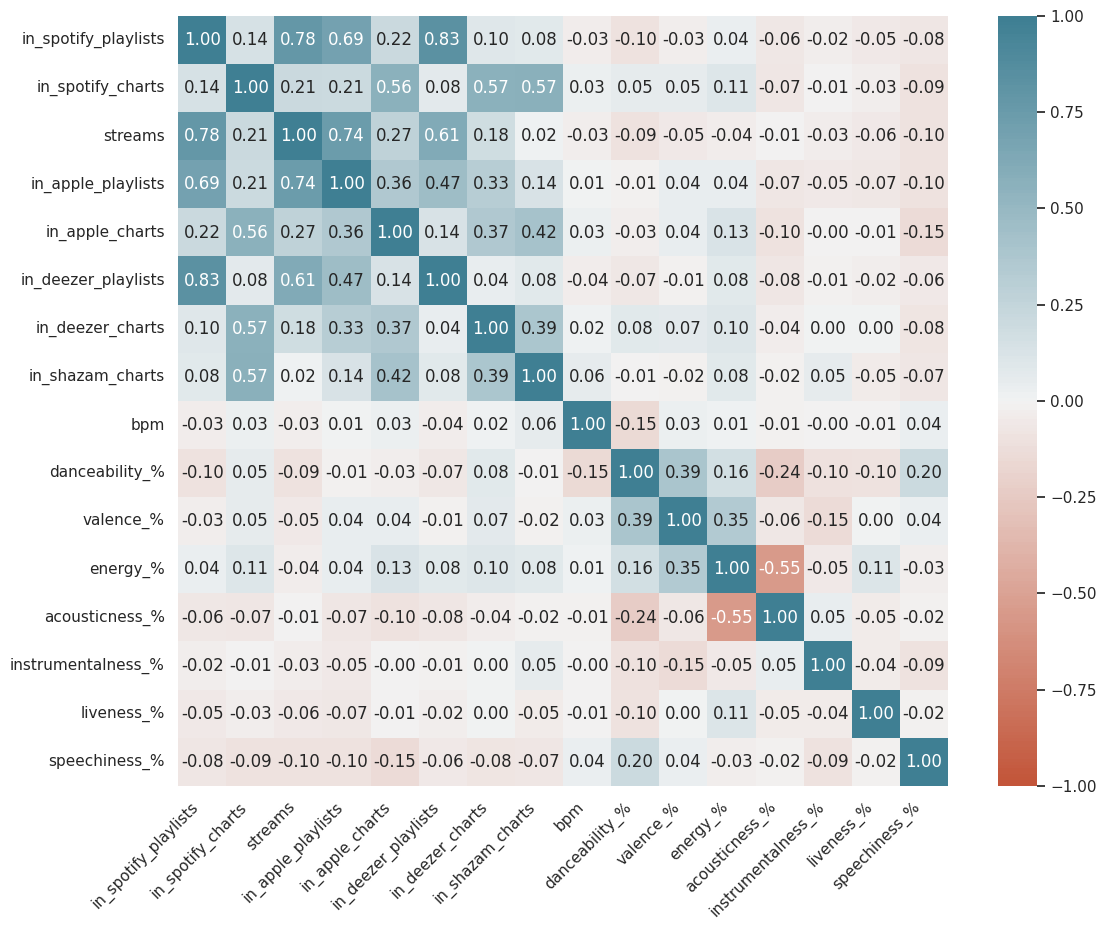

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))

# crear el heatmap
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt = '0.2f',
    annot=True
)

# etiquetas
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# gráfica
plt.show()

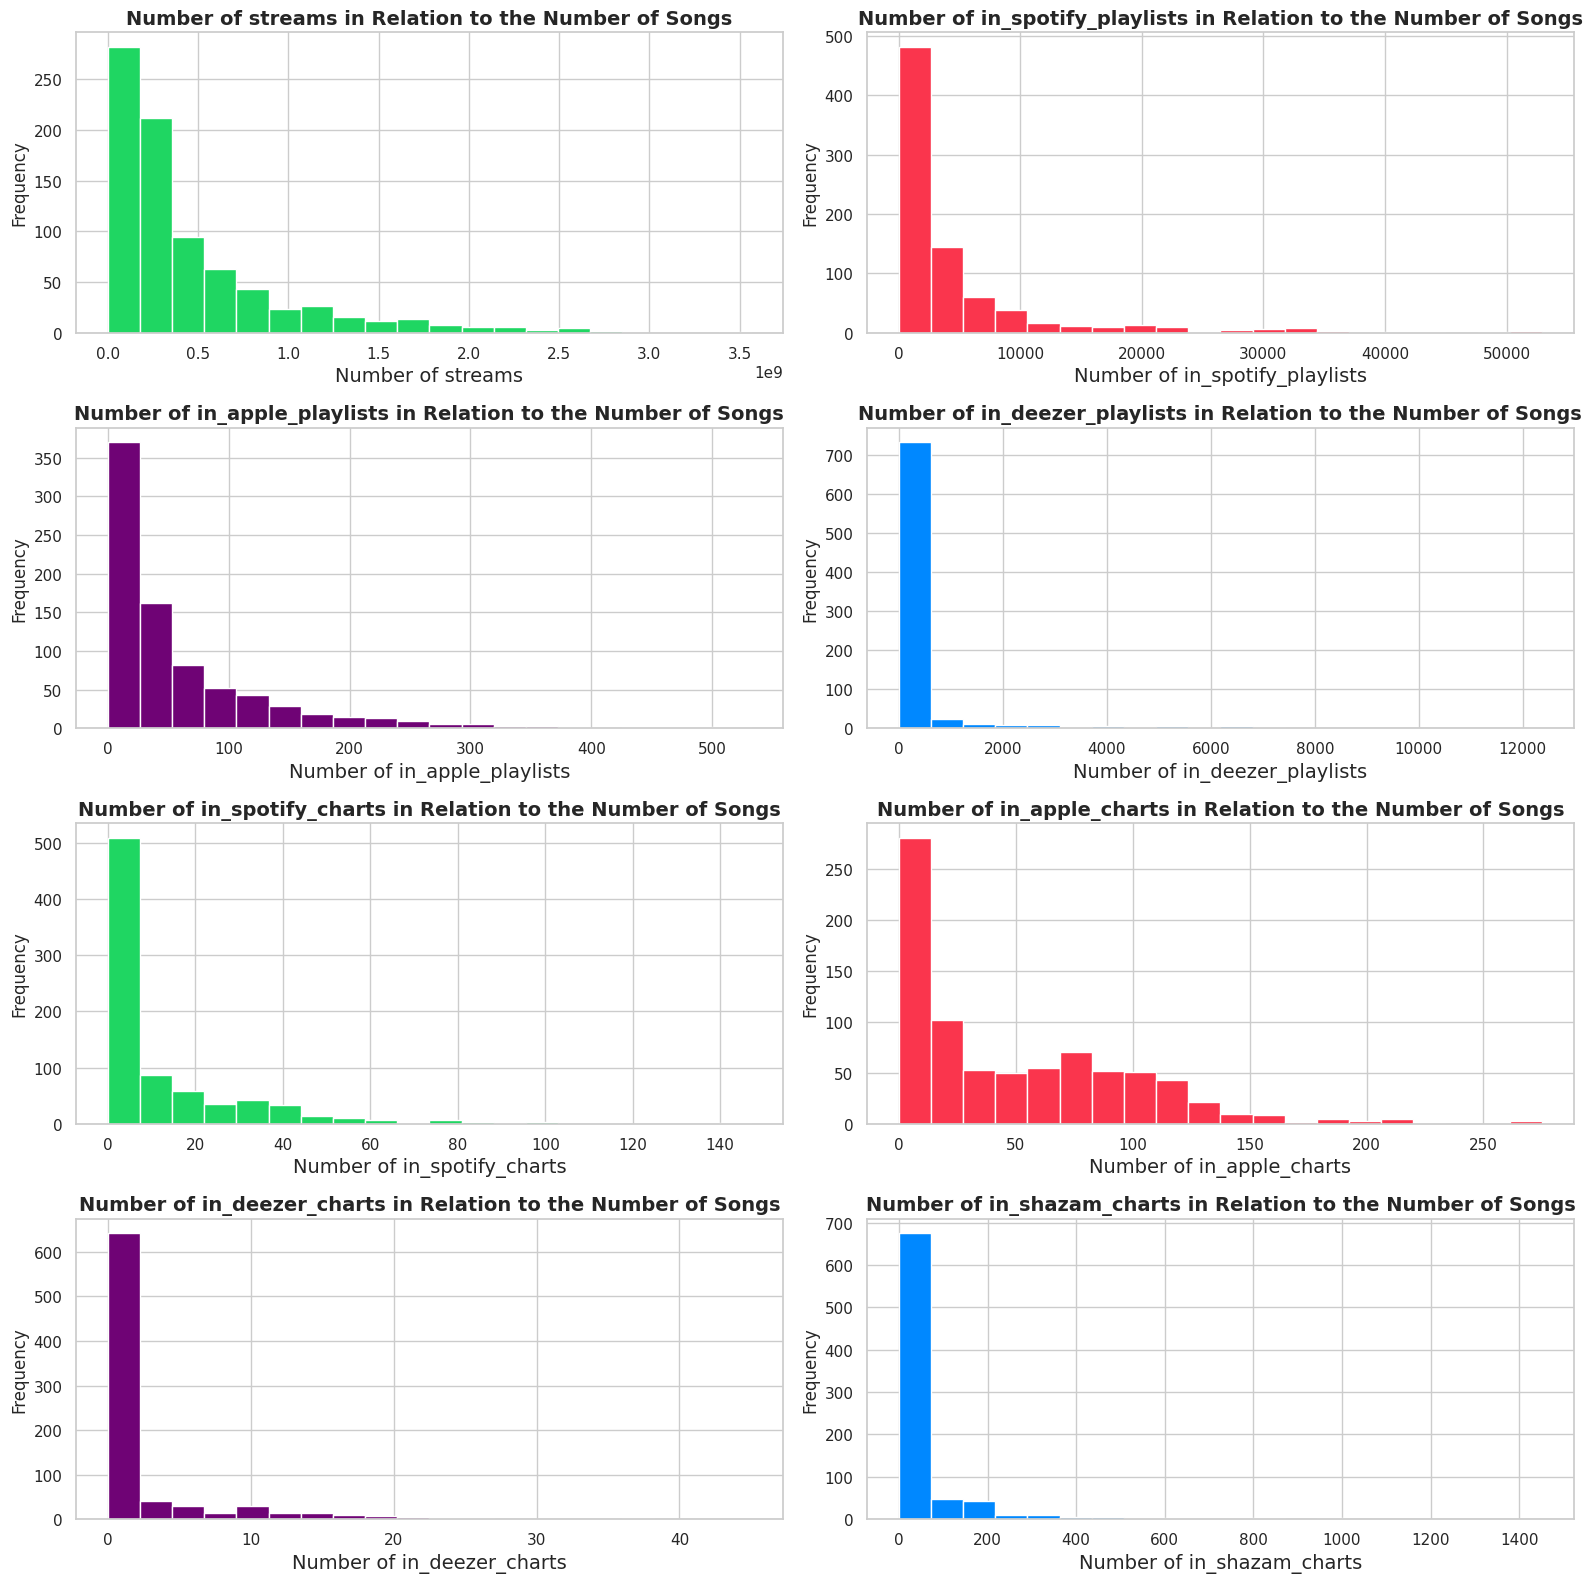

In [ ]:
import math

columns_to_plot = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
colors = ["#1FD662", "#FA354D", "#6F0375", "#0088FF", "#1FD662", "#FA354D", "#6F0375", "#0088FF"]

# Calcula el número de filas y columnas para las gráficas
num_columns = len(columns_to_plot)
num_rows = math.ceil(num_columns / 2)

# Crea la malla para las gráficas
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))

for i, column in enumerate(columns_to_plot):

    ax = axes[i // 2, i % 2]


    ax.hist(df[column], color=colors[i], bins=20)


    ax.set_xlabel(f"Number of {column}", fontsize=14)
    ax.set_ylabel("Frequency")


    ax.set_title(f"Number of {column} in Relation to the Number of Songs", fontsize=14, weight = "bold")


for i in range(num_columns, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

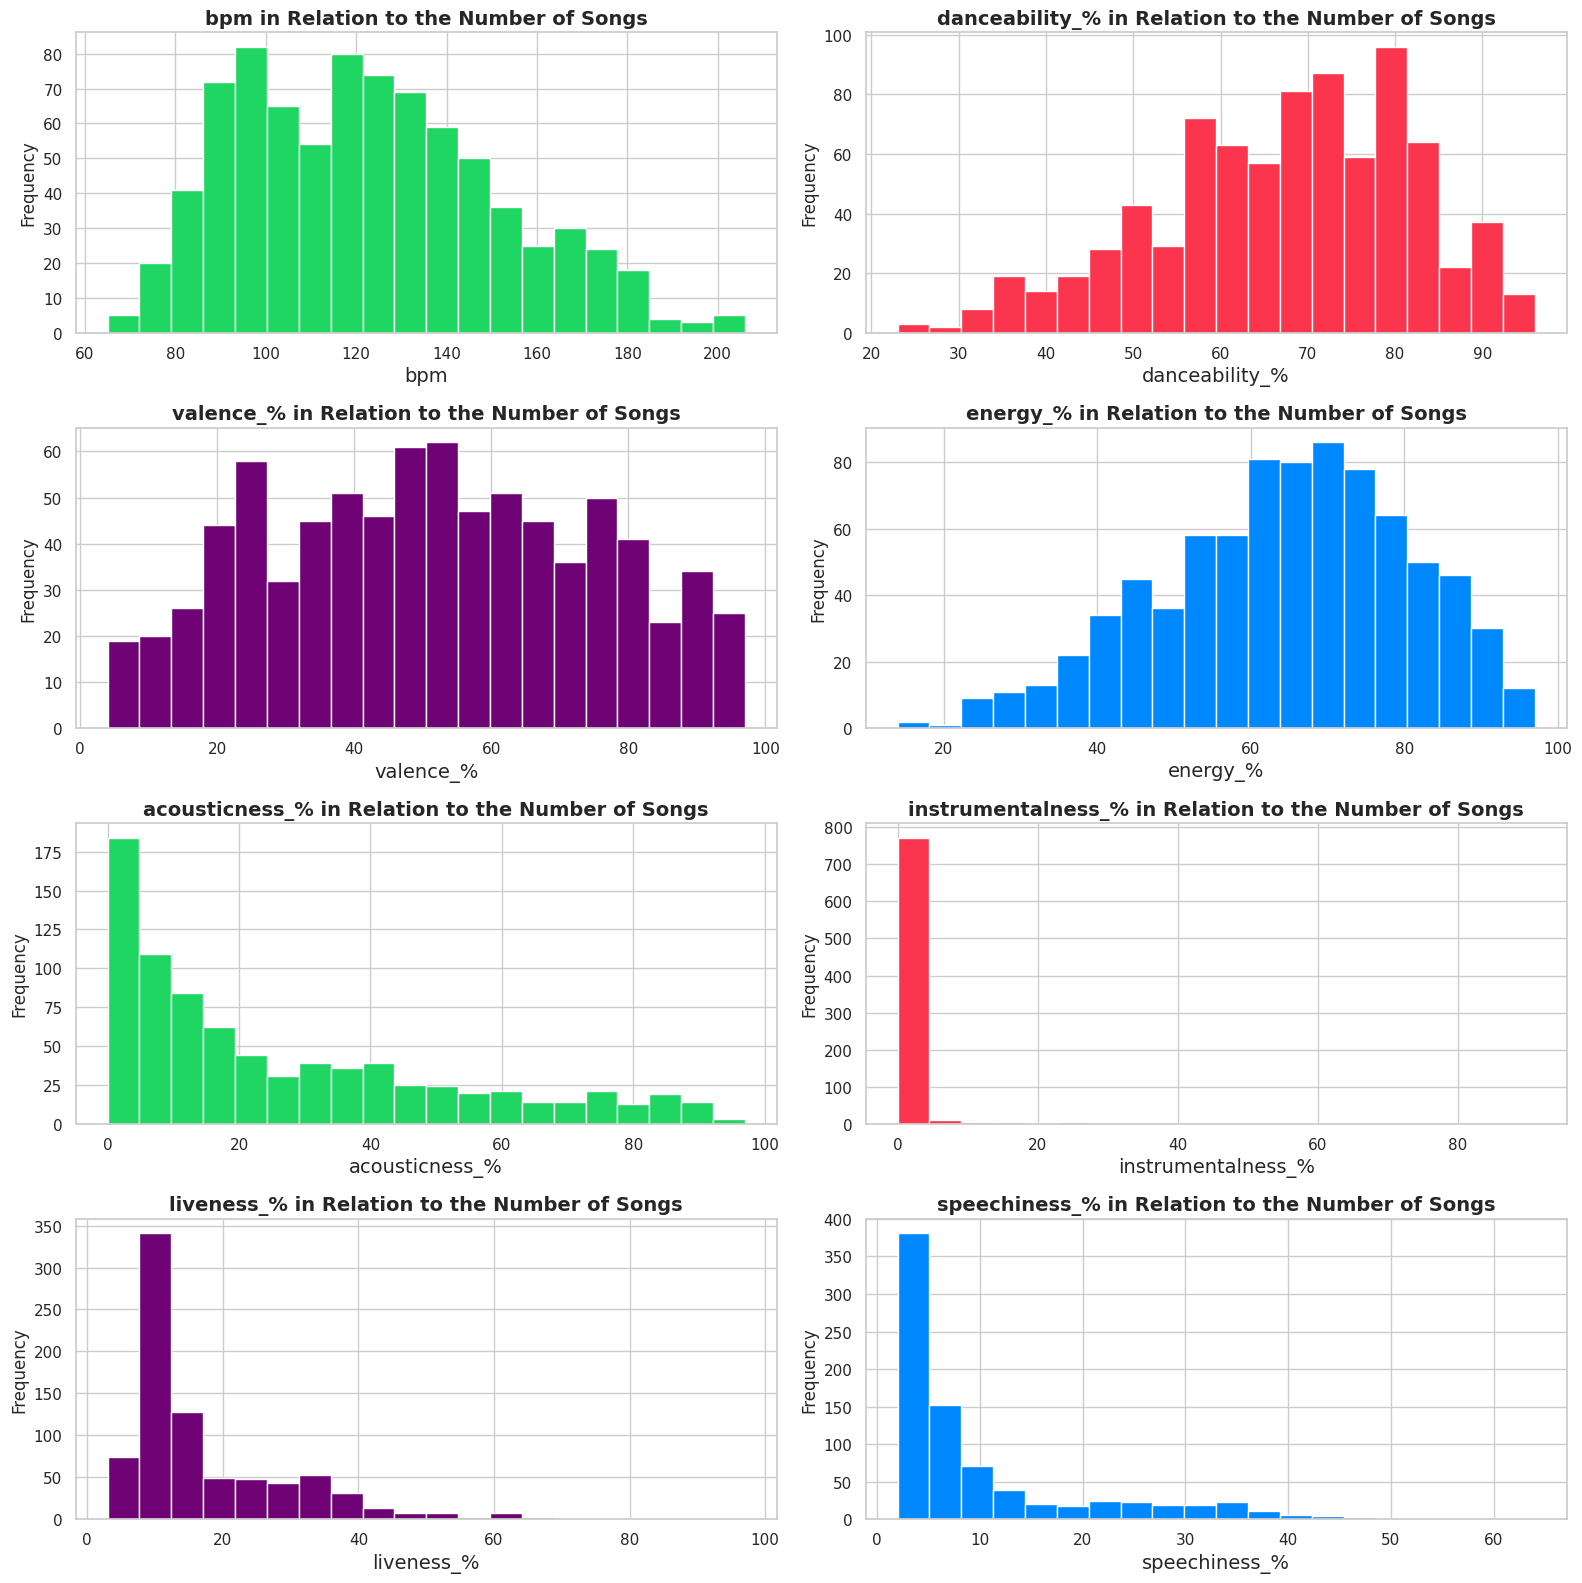

In [ ]:
import math

columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
colors = ["#1FD662", "#FA354D", "#6F0375", "#0088FF", "#1FD662", "#FA354D", "#6F0375", "#0088FF"]


num_columns = len(columns_to_plot)
num_rows = math.ceil(num_columns / 2)


fig, axes = plt.subplots(num_rows, 2, figsize=(16, 16))

for i, column in enumerate(columns_to_plot):

    ax = axes[i // 2, i % 2]


    ax.hist(df[column], color=colors[i], bins=20)


    ax.set_xlabel(f"{column}", fontsize=14)
    ax.set_ylabel("Frequency")


    ax.set_title(f"{column} in Relation to the Number of Songs", fontsize=14, weight = "bold")


for i in range(num_columns, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
df.agg({"bpm" : ["median", "mean", "std"]})

,bpm
median,120.000000
mean,122.580882
std,28.188643


In [ ]:
df.head(100).agg({"bpm" : ["median", "mean", "std"]})

,bpm
median,125.50000
mean,125.42000
std,28.92246


In [ ]:
df[["bpm", "streams"]].corr()

,bpm,streams
bpm,1.000000,-0.025694
streams,-0.025694,1.000000


In [ ]:
df[["bpm", "in_spotify_charts"]].corr()

,bpm,in_spotify_charts
bpm,1.000000,0.028496
in_spotify_charts,0.028496,1.000000


In [ ]:
df[["danceability_%", "streams"]].corr()

,danceability_%,streams
danceability_%,1.000000,-0.093268
streams,-0.093268,1.000000


In [ ]:
df[["danceability_%", "in_spotify_charts"]].corr()

,danceability_%,in_spotify_charts
danceability_%,1.000000,0.050623
in_spotify_charts,0.050623,1.000000


In [ ]:
df[["valence_%", "streams"]].corr()

,valence_%,streams
valence_%,1.000000,-0.051014
streams,-0.051014,1.000000


In [ ]:
df[["valence_%", "in_spotify_charts"]].corr()

,valence_%,in_spotify_charts
valence_%,1.000000,0.050862
in_spotify_charts,0.050862,1.000000


In [ ]:
df[["energy_%", "streams"]].corr()

,energy_%,streams
energy_%,1.000000,-0.036499
streams,-0.036499,1.000000


In [ ]:
df[["energy_%", "in_spotify_charts"]].corr()

,energy_%,in_spotify_charts
energy_%,1.000000,0.105217
in_spotify_charts,0.105217,1.000000


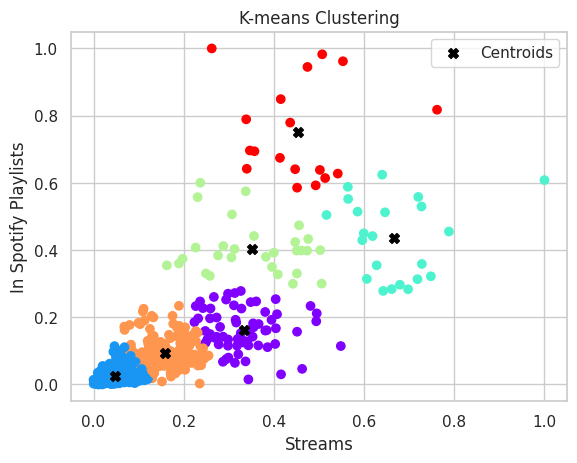

In [ ]:
# Clustering

data = df[["streams", "in_spotify_playlists"]].to_numpy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


model1 = skcluster.KMeans(n_clusters=6, random_state=4, n_init=10, max_iter=1000)

model1.fit(scaled_data)


cluster_assignments = model1.labels_
centroids = model1.cluster_centers_


plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_assignments, cmap='rainbow')


plt.scatter(centroids[:, 0], centroids[:, 1], s=50, color='black', marker='X', label='Centroids')


plt.xlabel('Streams')
plt.ylabel('In Spotify Playlists')
plt.title('K-means Clustering')
plt.legend()

plt.show()


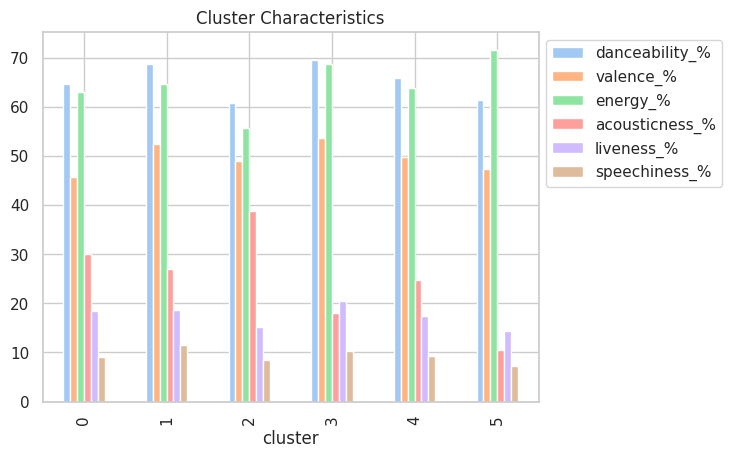

In [ ]:
clustered_df = df.copy()
cluster_labels = model1.labels_
clustered_df['cluster'] = cluster_labels

cluster_means = clustered_df[["cluster", "danceability_%", "valence_%", "energy_%", "acousticness_%", "liveness_%", "speechiness_%"]].groupby('cluster').mean()

cluster_means.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

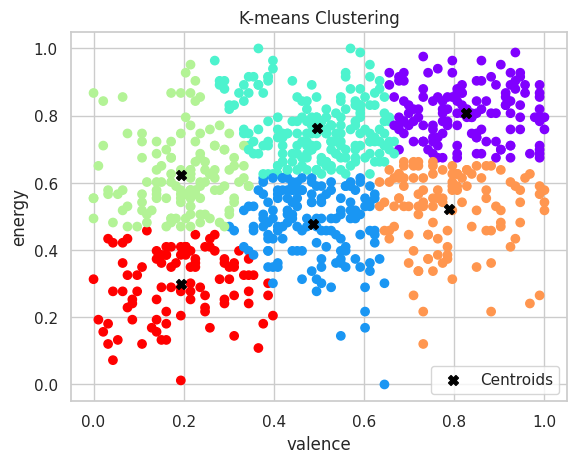

In [ ]:
data2 = df[["valence_%", "energy_%"]].to_numpy()

scaler2 = MinMaxScaler()
scaled_data2 = scaler.fit_transform(data2)


model2 = skcluster.KMeans(n_clusters=6, random_state=4, n_init = 10, max_iter = 1000)

model2.fit(scaled_data2)


cluster_assignments2 = model2.labels_
centroids2 = model2.cluster_centers_


plt.scatter(scaled_data2[:, 0], scaled_data2[:, 1], c=cluster_assignments2, cmap='rainbow')


plt.scatter(centroids2[:, 0], centroids2[:, 1], s=50, color='black', marker='X', label='Centroids')


plt.xlabel('valence')
plt.ylabel('energy')
plt.title('K-means Clustering')
plt.legend()

plt.show()

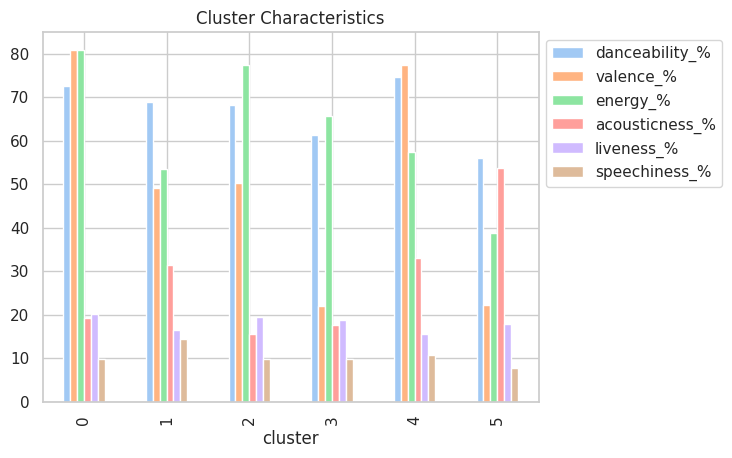

In [ ]:
clustered_df2 = df.copy()
cluster_labels2 = model2.labels_
clustered_df2['cluster'] = cluster_labels2

cluster_means2 = clustered_df2[["cluster", "danceability_%", "valence_%", "energy_%", "acousticness_%", "liveness_%", "speechiness_%"]].groupby('cluster').mean()

cluster_means2.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()